This notebook focuses on my music listening habits, with data extracted from the Spotify API and stored in CSV files. The insights have been drawn using the PySpark library, Matplotlib library, and Seaborn library. These tools have helped visualize my number of plays daily, my top 10 artists based on recently played songs, the popularity of all artists I listen to, the popularity of my top songs, and my top 10 artists based on my top songs.

Additionally, I've used the PySpark initcap function to normalize the CSV data into a capitalized typecase to address any inconsistencies.

In [62]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("SpotifyDataNormalization") \
    .getOrCreate()

# Load the data from CSV
historical_tracks_file = "all_recent_tracks.csv"
df = spark.read.csv(historical_tracks_file, header=True, inferSchema=True)

# Normalize the track and artist names
df = df.withColumn('track_name', expr("initcap(track_name)"))
df = df.withColumn('artist_name', expr("initcap(artist_name)"))

df.show()




+--------------------+---------------+--------------------+
|          track_name|    artist_name|           played_at|
+--------------------+---------------+--------------------+
|         Someone New|         Laufey|2025-02-03 05:42:...|
|     I Wish You Love|         Laufey|2025-02-03 05:45:...|
|No One Knows (wit...|Stephen Sanchez|2025-02-03 05:49:...|
|     Like The Movies|         Laufey|2025-02-03 05:52:...|
|               James|         Laufey|2025-02-03 05:55:...|
|             Fragile|         Laufey|2025-02-03 05:59:...|
|              Yeshua|   Minister Guc|2025-02-03 19:58:...|
|       Rahama (live)|     Kaestrings|2025-02-03 20:08:...|
|Dancin - Krono Remix|    Aaron Smith|2025-02-04 01:22:...|
|              Te Amo|       121selah|2025-02-04 01:25:...|
|Mr Right (with Me...|   Mae Stephens|2025-02-04 01:28:...|
|             Alright|    Sam Fischer|2025-02-04 01:30:...|
|Intro (end Of The...|  Ariana Grande|2025-02-04 01:31:...|
|              God Is|     Kanye West|20

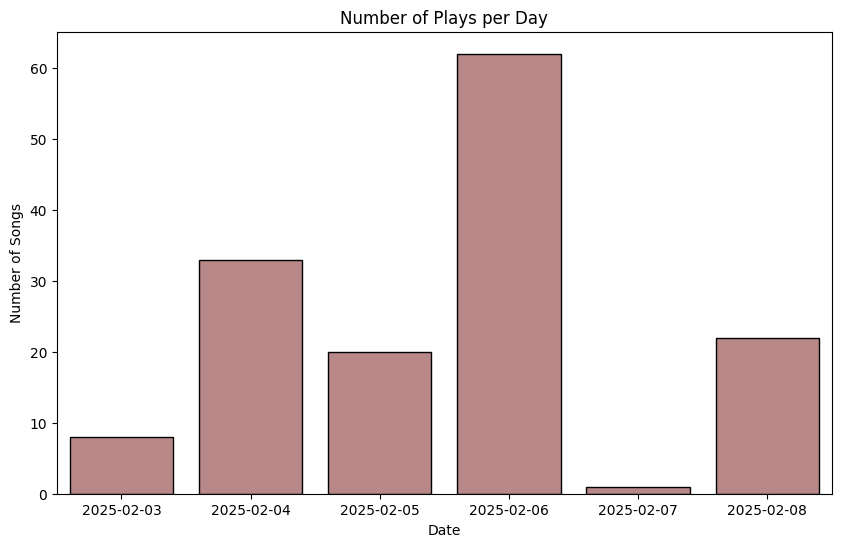

In [50]:
from pyspark.sql.functions import to_date, count
import matplotlib.pyplot as plt
import seaborn as sns

# Convert played_at to date
df = df.withColumn('Day', to_date('played_at'))

# Filter by Day: Count the number of plays per day
filtered_by_day = df.groupBy('Day').agg(count('track_name').alias('No of songs'))

# Convert to pandas DataFrame for visualization
filtered_by_day_pd = filtered_by_day.toPandas()

# Sort the DataFrame by 'Day'
filtered_by_day_pd = filtered_by_day_pd.sort_values(by='Day')

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_by_day_pd, x='Day', y='No of songs', color='#C08081',edgecolor='black')
plt.title('Number of Plays per Day')
plt.xticks(rotation=0)
plt.xlabel('Date')
plt.ylabel('Number of Songs')
plt.show()



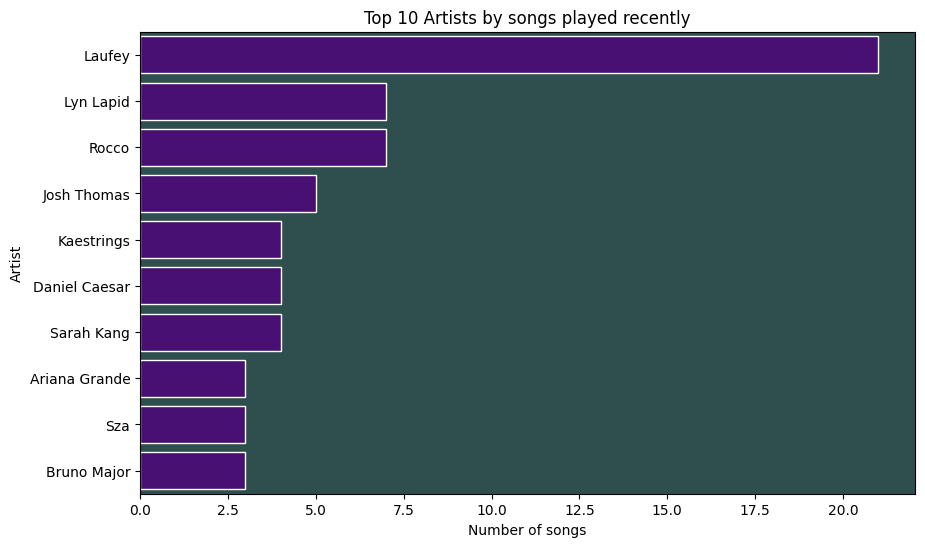

In [51]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt
import seaborn as sns

artist_tracks = df.groupBy('artist_name').agg(count('track_name').alias('songs'))

artist_tracks_pd = artist_tracks.toPandas()

top_artists_pd = artist_tracks_pd.sort_values(by='songs', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists_pd, x='songs', y='artist_name' ,color='#4B0082',edgecolor = '#ffffff' ).set_facecolor('#2F4F4F')
plt.title('Top 10 Artists by songs played recently')
plt.xlabel('Number of songs')
plt.ylabel('Artist')
plt.show()


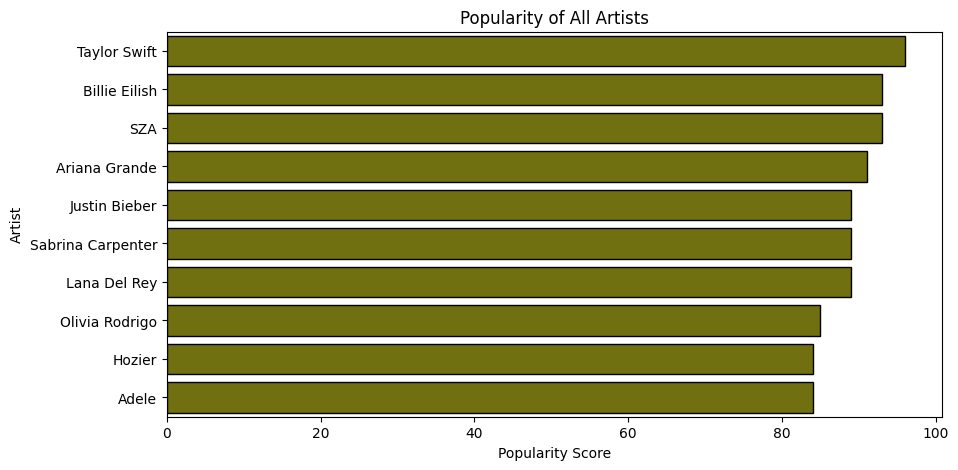

In [52]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark2 = SparkSession.builder \
    .appName("SpotifyDataFiltering1") \
    .getOrCreate()

historical_tracks_file = "all_top_artists.csv"
df1 = spark2.read.csv(historical_tracks_file, header=True, inferSchema=True)

artist_popularity_pd = df1.select('Artistname', 'FamousLevel').toPandas()

artist_popularity_pd = artist_popularity_pd.sort_values(by='FamousLevel', ascending=False).head(10)

# Visualize the popularity of all artists
plt.figure(figsize=(10, 5))
sns.barplot(data=artist_popularity_pd, y='Artistname', x='FamousLevel',color='#808000', edgecolor = '000')
plt.title('Popularity of All Artists')
plt.xlabel('Popularity Score')
plt.ylabel('Artist')

plt.show()

C:\Users\IFEOMA\AppData\Local\Temp\ipykernel_10808\3477982490.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tracks_popularity_pd, x= 'popularity', y= 'track_name', palette=sns.color_palette("Purples")[::-1], edgecolor = '000')
C:\Users\IFEOMA\AppData\Local\Temp\ipykernel_10808\3477982490.py:16: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=tracks_popularity_pd, x= 'popularity', y= 'track_name', palette=sns.color_palette("Purples")[::-1], edgecolor = '000')


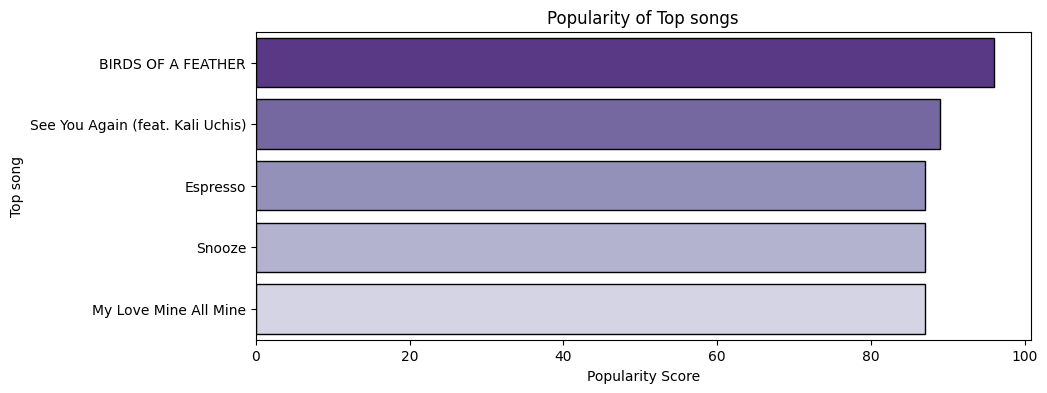

In [53]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark3 = SparkSession.builder \
    .appName("SpotifyDataFiltering2") \
    .getOrCreate()

historical_tracks_file = "all_top_tracks.csv"
df2 = spark3.read.csv(historical_tracks_file, header=True, inferSchema=True)

tracks_popularity_pd = df2.select('track_name','popularity').toPandas()

tracks_popularity_pd = tracks_popularity_pd.sort_values(by='popularity', ascending=False).head(5)

plt.figure(figsize=(10,4))
sns.barplot(data=tracks_popularity_pd, x= 'popularity', y= 'track_name', palette=sns.color_palette("Purples")[::-1], edgecolor = '000')
plt.title('Popularity of Top songs')
plt.xlabel('Popularity Score')
plt.ylabel('Top song')

plt.show()

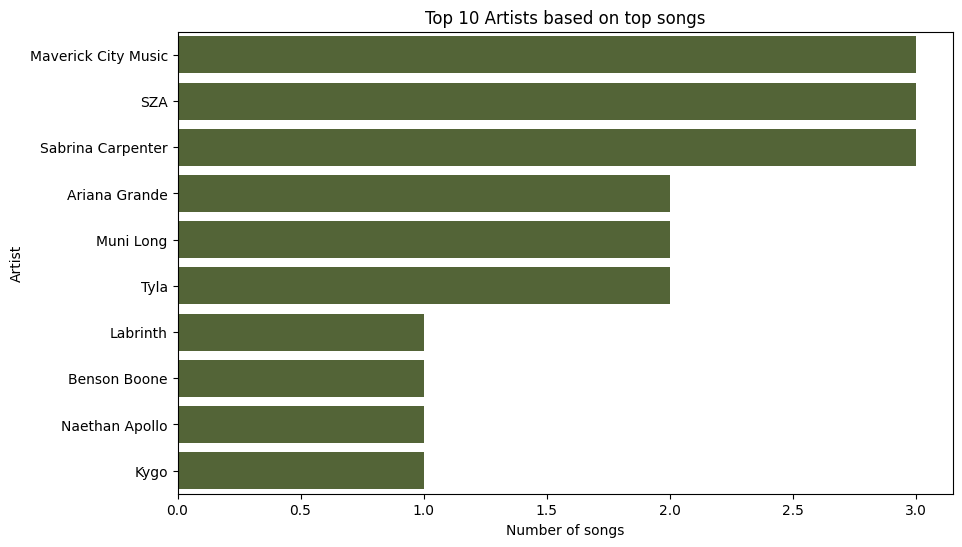

In [54]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

artist_top_track = df2.groupBy('artist_name').agg(count('track_name').alias('songs'))

artist_top_track_pd = artist_top_track.toPandas()

artist_top_track_pd = artist_top_track_pd.sort_values(by='songs', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=artist_top_track_pd, x='songs', y='artist_name',color='#556B2F')
plt.title('Top 10 Artists based on top songs')
plt.xlabel('Number of songs')
plt.ylabel('Artist')
plt.show()